## Задание 1

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [1]:
import numpy as np
import re
from collections import Counter
import pandas as pd
from  scipy.spatial.distance import cosine

In [22]:
sentences=open('sentences.txt', 'r').read().lower()

In [44]:
sentences_splited=sentences.split('\n')[:-1]

In [46]:
tokinize_sentences=[[w for w in re.split('[^a-z]', s) if w!=''] for s in sentences_splited]
tokinize_sentences

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

In [47]:
words_dict=dict([ (w,i) for i, w in enumerate([w for s in tokinize_sentences for w in s])])

In [52]:
df=pd.DataFrame([ Counter(s) for s in tokinize_sentences ]).fillna(0)
matrix=df.values

In [53]:
words_dict=dict([ (w,i) for i, w in enumerate(df.columns)])

In [77]:
coefs=pd.DataFrame([cosine(matrix[0], matrix[i]) for i in range(matrix.shape[0])])

In [88]:
sent_idx=coefs.sort_values(by=0, ascending=True).head(3).index[1:].tolist()
open('submission-1.txt', 'w').write(' '.join([str(i) for i in sent_idx]))

3

## Задание 2

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).


In [2]:
import matplotlib.pyplot as plt
from  scipy import linalg

%matplotlib inline

In [29]:
x = np.linspace(1, 15);

def calculate (x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)

In [20]:
a = np.array([1, 15])
c = np.array([1, 8, 15])
e = np.array([1, 4, 10, 15])

b = np.array(map(calculate, a))
d = np.array(map(calculate, c))
f = np.array(map(calculate, e))

In [21]:
def extend1 (x):
    return [1, x]

def extend2 (x):
    return [1, x, x * x]

def extend3 (x):
    return [1, x, x * x, x * x * x]

In [22]:
a = map(extend1, a)
c = map(extend2, c)
e = map(extend3, e)

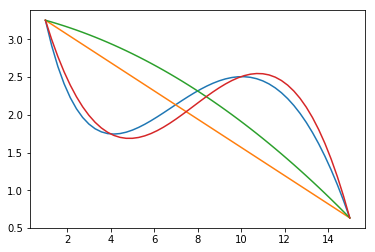

In [34]:
line=plt.plot(x, np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))
w_0, w_1 = linalg.solve(a, b)
line2 = plt.plot(x, x * w_1 + w_0)
w_0 = linalg.solve(c, d)
line3 = plt.plot(x, x * x * w_0[2] + x * w_0[1] + w_0[0])
w_0, w_1, w_2, w_3 = linalg.solve(e, f)
line4 = plt.plot(x, x * x * x * w_3 + x * x * w_2 + x * w_1 + w_0)

In [24]:
open('submission-2.txt', 'w').write('{:.2f} {:.2f} {:.2f} {:.2f}'.format(w_0, w_1, w_2, w_3))